In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [29]:
# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# Drop non-numeric columns for clustering
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [32]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

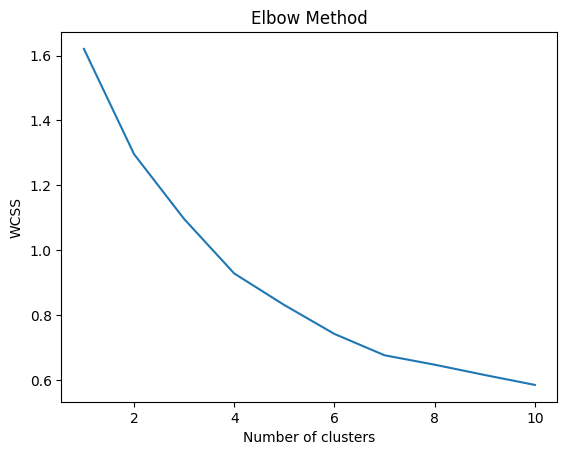

     CustomerID  Cluster
0             1        4
1             2        0
2             3        4
3             4        0
4             5        4
..          ...      ...
195         196        2
196         197        1
197         198        2
198         199        1
199         200        2

[200 rows x 2 columns]


In [33]:
# Determine the optimal number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    centroids, distortion = kmeans(X_scaled, i)
    wcss.append(distortion)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow Method, let's choose k=5
k = 5

# Apply k-means clustering with the chosen k
centroids, _ = kmeans(X_scaled, k)
df['Cluster'], _ = vq(X_scaled, centroids)

# Display the resulting clusters
print(df[['CustomerID', 'Cluster']])